In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"https://raw.githubusercontent.com/swrrocky17/Internship/main/Car24/Car24_data.csv")
df.head()

,Unnamed: 0,index,car_Brand,car_owner,car_kilometers,car_fuel_type,car_transmission,car_model,car_price,location
0,0,0,2014 Honda Amaze,1st Owner,"53,242 km",Petrol,Manual,1.2 SMT I VTEC Manual,"₹4,13,999",Mumbai
1,1,1,2019 Maruti Dzire,1st Owner,"31,248 km",Petrol,Automatic,VXI AMT Automatic,"₹7,14,299",Mumbai
2,2,2,2017 Ford Ecosport,1st Owner,471 km,Petrol,Automatic,1.5 TITANIUM TI VCT AT Automatic,"₹8,44,999",Mumbai
3,3,3,2019 KIA SELTOS,1st Owner,"12,407 km",Petrol,Manual,GTX+ 1.4 MT Manual,"₹16,13,699",Mumbai
4,4,4,2017 Hyundai Elite i20,1st Owner,"35,164 km",Petrol,Manual,ASTA 1.2 Manual,"₹6,53,299",Mumbai


In [3]:
df.shape

(5342, 10)

The dataset has 10 columns and 5324 rows

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5342 entries, 0 to 5341
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        5342 non-null   int64 
 1   index             5342 non-null   int64 
 2   car_Brand         5342 non-null   object
 3   car_owner         5342 non-null   object
 4   car_kilometers    5342 non-null   object
 5   car_fuel_type     5342 non-null   object
 6   car_transmission  5289 non-null   object
 7   car_model         5342 non-null   object
 8   car_price         5342 non-null   object
 9   location          5342 non-null   object
dtypes: int64(2), object(8)
memory usage: 417.5+ KB


# Check missing data

In [5]:
df.isnull().sum()

Unnamed: 0           0
index                0
car_Brand            0
car_owner            0
car_kilometers       0
car_fuel_type        0
car_transmission    53
car_model            0
car_price            0
location             0
dtype: int64

In [6]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total Count', '% of Missing Data'])
missing_data.head(5)

,Total Count,% of Missing Data
car_transmission,53,1.0
Unnamed: 0,0,0.0
index,0,0.0
car_Brand,0,0.0
car_owner,0,0.0


- We know that imputing missing data with <b>mean</b> values can only be done with numerical data.


- Another technique is median imputation in which the missing values are replaced with the median value of the entire feature column. When the data is skewed, it is good to consider using the median value for replacing the missing values.We must note that imputing missing data with <b>median</b> value can only be done with numerical data.


- Yet another technique is mode imputation in which the missing values are replaced with the mode value or most frequent value of the entire feature column. When the data is skewed, it is good to consider using <b>mode</b> values for replacing the missing values.We must note that imputing missing data with mode values can be done with numerical and categorical data.

In [7]:
df['car_transmission']=df['car_transmission'].fillna(df['car_transmission'].mode()[0])

We see that Unnamed: 0 and index are of no use, so lets drop these columns straight away

In [8]:
df.drop(['Unnamed: 0','index'],axis=1,inplace=True)

In [9]:
df.isnull().sum()

car_Brand           0
car_owner           0
car_kilometers      0
car_fuel_type       0
car_transmission    0
car_model           0
car_price           0
location            0
dtype: int64

There is no missing data now

<AxesSubplot:>

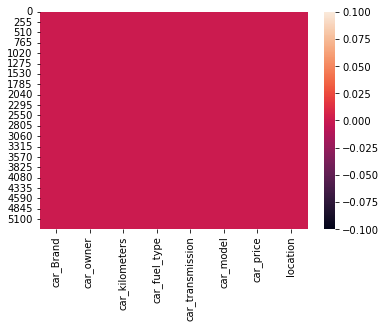

In [10]:
sns.heatmap(df.isnull())

In [11]:
df.head()

,car_Brand,car_owner,car_kilometers,car_fuel_type,car_transmission,car_model,car_price,location
0,2014 Honda Amaze,1st Owner,"53,242 km",Petrol,Manual,1.2 SMT I VTEC Manual,"₹4,13,999",Mumbai
1,2019 Maruti Dzire,1st Owner,"31,248 km",Petrol,Automatic,VXI AMT Automatic,"₹7,14,299",Mumbai
2,2017 Ford Ecosport,1st Owner,471 km,Petrol,Automatic,1.5 TITANIUM TI VCT AT Automatic,"₹8,44,999",Mumbai
3,2019 KIA SELTOS,1st Owner,"12,407 km",Petrol,Manual,GTX+ 1.4 MT Manual,"₹16,13,699",Mumbai
4,2017 Hyundai Elite i20,1st Owner,"35,164 km",Petrol,Manual,ASTA 1.2 Manual,"₹6,53,299",Mumbai


In [12]:
df['car_Year'],df['Brand'] = df['car_Brand'].str.split(' ',1).str
df.head(2)

,car_Brand,car_owner,car_kilometers,car_fuel_type,car_transmission,car_model,car_price,location,car_Year,Brand
0,2014 Honda Amaze,1st Owner,"53,242 km",Petrol,Manual,1.2 SMT I VTEC Manual,"₹4,13,999",Mumbai,2014,Honda Amaze
1,2019 Maruti Dzire,1st Owner,"31,248 km",Petrol,Automatic,VXI AMT Automatic,"₹7,14,299",Mumbai,2019,Maruti Dzire


In [13]:
#Lets split car_kilometers also to get the total km ran
df['Total_KM_Ran'],df['km'] = df['car_kilometers'].str.split(' ',1).str
df.head(2)

,car_Brand,car_owner,car_kilometers,car_fuel_type,car_transmission,car_model,car_price,location,car_Year,Brand,Total_KM_Ran,km
0,2014 Honda Amaze,1st Owner,"53,242 km",Petrol,Manual,1.2 SMT I VTEC Manual,"₹4,13,999",Mumbai,2014,Honda Amaze,"53,242",km
1,2019 Maruti Dzire,1st Owner,"31,248 km",Petrol,Automatic,VXI AMT Automatic,"₹7,14,299",Mumbai,2019,Maruti Dzire,"31,248",km


In [14]:
df['car_price'] = df['car_price'].str.replace('₹','')
df.head(2)

,car_Brand,car_owner,car_kilometers,car_fuel_type,car_transmission,car_model,car_price,location,car_Year,Brand,Total_KM_Ran,km
0,2014 Honda Amaze,1st Owner,"53,242 km",Petrol,Manual,1.2 SMT I VTEC Manual,"4,13,999",Mumbai,2014,Honda Amaze,"53,242",km
1,2019 Maruti Dzire,1st Owner,"31,248 km",Petrol,Automatic,VXI AMT Automatic,"7,14,299",Mumbai,2019,Maruti Dzire,"31,248",km


In [15]:
#Now car_Brand column and km is of no use, so lets drop them.
df.drop(['car_Brand','km'],axis=1,inplace=True)
df.head()

,car_owner,car_kilometers,car_fuel_type,car_transmission,car_model,car_price,location,car_Year,Brand,Total_KM_Ran
0,1st Owner,"53,242 km",Petrol,Manual,1.2 SMT I VTEC Manual,"4,13,999",Mumbai,2014,Honda Amaze,"53,242"
1,1st Owner,"31,248 km",Petrol,Automatic,VXI AMT Automatic,"7,14,299",Mumbai,2019,Maruti Dzire,"31,248"
2,1st Owner,471 km,Petrol,Automatic,1.5 TITANIUM TI VCT AT Automatic,"8,44,999",Mumbai,2017,Ford Ecosport,471
3,1st Owner,"12,407 km",Petrol,Manual,GTX+ 1.4 MT Manual,"16,13,699",Mumbai,2019,KIA SELTOS,"12,407"
4,1st Owner,"35,164 km",Petrol,Manual,ASTA 1.2 Manual,"6,53,299",Mumbai,2017,Hyundai Elite i20,"35,164"


In [16]:
print(df['location'].unique())
print(df['car_owner'].unique())

['Mumbai' 'Gurgaon' 'Pune' 'Banglore' 'Chennai' 'Ahmedabad' 'Noida'
 'Kolkata' 'Hyderabad' 'Chandigarh' 'Bhopal' 'Delhi' 'Coimbatore' 'Surat'
 'Kochi' 'Lucknow']
['1st Owner' '2nd Owner' '4th Owner' '3rd Owner']


In [17]:
print(df['Brand'].unique())

['Honda Amaze' 'Maruti Dzire' 'Ford Ecosport' 'KIA SELTOS'
 'Hyundai Elite i20' 'MG HECTOR' 'Hyundai Tucson New' 'Hyundai i20 Active'
 'Volkswagen Ameo' 'Tata NEXON' 'Hyundai Creta' 'Maruti Ertiga'
 'Renault TRIBER' 'Hyundai i20' 'Mahindra TUV300' 'Tata Hexa'
 'Tata ALTROZ' 'Maruti Vitara Brezza' 'Maruti New Wagon-R' 'KIA SONET'
 'Tata Harrier' 'Mahindra Scorpio' 'Toyota Glanza' 'Maruti S Cross'
 'Jeep Compass' 'Honda WR-V' 'Maruti Baleno' 'Hyundai VENUE'
 'Hyundai Verna' 'Maruti Ciaz' 'Hyundai Grand i10' 'Maruti IGNIS'
 'Honda Jazz' 'Skoda Rapid' 'Toyota Corolla Altis' 'Maruti Celerio'
 'Honda Civic' 'Volkswagen Polo' 'Toyota Innova' 'Volkswagen Vento'
 'Honda City' 'Skoda Superb' 'Renault Kwid' 'Mahindra XUV500'
 'Maruti S PRESSO' 'Hyundai Eon' 'Maruti Alto' 'Datsun Redi Go'
 'Maruti Swift' 'Maruti Swift Dzire' 'Honda Brio' 'Maruti Wagon R 1.0'
 'Toyota Etios Liva' 'Maruti Alto 800' 'Maruti Alto K10' 'Tata TIGOR'
 'Toyota Innova Crysta' 'Maruti XL6' 'Mercedes Benz CLA Class'
 'Hyunda

In [18]:
print(df['car_transmission'].unique())

['Manual' 'Automatic']


In [19]:
print(df['car_fuel_type'].unique())

['Petrol' 'Diesel' 'Petrol + CNG' 'Petrol + LPG']


In [20]:
print(df['car_model'].unique())

['1.2 SMT I VTEC Manual' 'VXI AMT Automatic'
 '1.5 TITANIUM TI VCT AT Automatic' 'GTX+ 1.4 MT Manual' 'ASTA 1.2 Manual'
 'SHARP 2.0 DIESEL Manual' '2WD AT GLS DIESEL Automatic' '1.2 S Manual'
 'HIGHLINE 1.2 Manual' 'XZ+ 1.5 Manual' '1.4 SX Manual'
 '1.6 E + VTVT Manual' '1.6 SX PLUS PETROL Manual' 'VXI Manual'
 '1.6 S Manual' '1.0 RXT Manual' 'SPORTZ 1.2 Manual' 'T8 Manual'
 'Varicor 400 XT Manual' 'XZ 1.2 Manual' 'ZDI Manual' 'ZXI 1.2 Manual'
 'GTX PLUS 1.5 DCT AT' 'VDI Manual' 'ZDI PLUS Manual'
 'XZ 2.0L Kryotec Manual' 'S5 Manual' 'V CVT Automatic' 'MAGNA 1.2 Manual'
 'ALPHA 1.3 Manual' '2.0 LONGITUDE Manual' 'LIMITED (O) 2.0 4*4 Manual'
 'G CVT Automatic' '1.5 i-DTEC VX MT Manual' '1.2 i-VTEC VX MT Manual'
 '1.2 SX Manual' 'ZETA 1.2 K12 Manual' '1.0L Turbo GDI SX MT Manual'
 '1.2 EMT I VTEC Manual' 'FLUIDIC 1.6 SX VTVT Manual'
 'DELTA 1.2 K12 Manual' 'SIGMA 1.3 Manual' 'VDI AMT Automatic'
 'ZETA 1.4 VVT Manual' 'SPORTS 1.2 VTVT Manual'
 'DELTA 1.2 K12 AMT Automatic' 'ZETA 1.2 K12 A

There are lots of car name which is not effect on output so need to drop the columns.

In [21]:
# Add a colume of current year
df['Current_Year']=2022
df

,car_owner,car_kilometers,car_fuel_type,car_transmission,car_model,car_price,location,car_Year,Brand,Total_KM_Ran,Current_Year
0,1st Owner,"53,242 km",Petrol,Manual,1.2 SMT I VTEC Manual,"4,13,999",Mumbai,2014,Honda Amaze,"53,242",2022
1,1st Owner,"31,248 km",Petrol,Automatic,VXI AMT Automatic,"7,14,299",Mumbai,2019,Maruti Dzire,"31,248",2022
2,1st Owner,471 km,Petrol,Automatic,1.5 TITANIUM TI VCT AT Automatic,"8,44,999",Mumbai,2017,Ford Ecosport,471,2022
3,1st Owner,"12,407 km",Petrol,Manual,GTX+ 1.4 MT Manual,"16,13,699",Mumbai,2019,KIA SELTOS,"12,407",2022
4,1st Owner,"35,164 km",Petrol,Manual,ASTA 1.2 Manual,"6,53,299",Mumbai,2017,Hyundai Elite i20,"35,164",2022
...,...,...,...,...,...,...,...,...,...,...,...
5337,1st Owner,"27,734 km",Petrol,Manual,LXI Manual,"2,40,499",Lucknow,2014,Maruti Alto 800,"27,734",2022
5338,1st Owner,"29,031 km",Diesel,Manual,LDI OPT Manual,"7,15,599",Lucknow,2018,Maruti Vitara Brezza,"29,031",2022
5339,2nd Owner,"5,289 km",Petrol,Automatic,VXI PLUS AGS Automatic,"4,90,599",Lucknow,2019,Maruti S PRESSO,"5,289",2022
5340,1st Owner,"23,928 km",Petrol,Manual,ZETA 1.2 K12 Manual,"6,73,299",Lucknow,2020,Maruti Baleno,"23,928",2022


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5342 entries, 0 to 5341
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   car_owner         5342 non-null   object
 1   car_kilometers    5342 non-null   object
 2   car_fuel_type     5342 non-null   object
 3   car_transmission  5342 non-null   object
 4   car_model         5342 non-null   object
 5   car_price         5342 non-null   object
 6   location          5342 non-null   object
 7   car_Year          5342 non-null   object
 8   Brand             5342 non-null   object
 9   Total_KM_Ran      5342 non-null   object
 10  Current_Year      5342 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 459.2+ KB


Since car_Year is of object data type, lets convert into int data type to calculate number of years

In [23]:
df["car_Year"] = df["car_Year"].astype(str).astype(int)

In [24]:
df['no_year'] = df['Current_Year'] - df['car_Year']
df

,car_owner,car_kilometers,car_fuel_type,car_transmission,car_model,car_price,location,car_Year,Brand,Total_KM_Ran,Current_Year,no_year
0,1st Owner,"53,242 km",Petrol,Manual,1.2 SMT I VTEC Manual,"4,13,999",Mumbai,2014,Honda Amaze,"53,242",2022,8
1,1st Owner,"31,248 km",Petrol,Automatic,VXI AMT Automatic,"7,14,299",Mumbai,2019,Maruti Dzire,"31,248",2022,3
2,1st Owner,471 km,Petrol,Automatic,1.5 TITANIUM TI VCT AT Automatic,"8,44,999",Mumbai,2017,Ford Ecosport,471,2022,5
3,1st Owner,"12,407 km",Petrol,Manual,GTX+ 1.4 MT Manual,"16,13,699",Mumbai,2019,KIA SELTOS,"12,407",2022,3
4,1st Owner,"35,164 km",Petrol,Manual,ASTA 1.2 Manual,"6,53,299",Mumbai,2017,Hyundai Elite i20,"35,164",2022,5
...,...,...,...,...,...,...,...,...,...,...,...,...
5337,1st Owner,"27,734 km",Petrol,Manual,LXI Manual,"2,40,499",Lucknow,2014,Maruti Alto 800,"27,734",2022,8
5338,1st Owner,"29,031 km",Diesel,Manual,LDI OPT Manual,"7,15,599",Lucknow,2018,Maruti Vitara Brezza,"29,031",2022,4
5339,2nd Owner,"5,289 km",Petrol,Automatic,VXI PLUS AGS Automatic,"4,90,599",Lucknow,2019,Maruti S PRESSO,"5,289",2022,3
5340,1st Owner,"23,928 km",Petrol,Manual,ZETA 1.2 K12 Manual,"6,73,299",Lucknow,2020,Maruti Baleno,"23,928",2022,2


Now we will drop below columns:
  - Drop car_Year and current year colume as we calculated no of year
  - Drop car_kilometers as we have Total_KM_Ran column
  -  Drop car_model and Brand as there are too many unique records

In [25]:
df.drop(['car_Year','Current_Year','car_kilometers','car_model','Brand'],axis=1,inplace=True)
df

,car_owner,car_fuel_type,car_transmission,car_price,location,Total_KM_Ran,no_year
0,1st Owner,Petrol,Manual,"4,13,999",Mumbai,"53,242",8
1,1st Owner,Petrol,Automatic,"7,14,299",Mumbai,"31,248",3
2,1st Owner,Petrol,Automatic,"8,44,999",Mumbai,471,5
3,1st Owner,Petrol,Manual,"16,13,699",Mumbai,"12,407",3
4,1st Owner,Petrol,Manual,"6,53,299",Mumbai,"35,164",5
...,...,...,...,...,...,...,...
5337,1st Owner,Petrol,Manual,"2,40,499",Lucknow,"27,734",8
5338,1st Owner,Diesel,Manual,"7,15,599",Lucknow,"29,031",4
5339,2nd Owner,Petrol,Automatic,"4,90,599",Lucknow,"5,289",3
5340,1st Owner,Petrol,Manual,"6,73,299",Lucknow,"23,928",2


In [26]:
df['car_price'] = df['car_price'].str.replace(',','')
df['Total_KM_Ran'] = df['Total_KM_Ran'].str.replace(',','')
df.head(2)

,car_owner,car_fuel_type,car_transmission,car_price,location,Total_KM_Ran,no_year
0,1st Owner,Petrol,Manual,413999,Mumbai,53242,8
1,1st Owner,Petrol,Automatic,714299,Mumbai,31248,3


In [27]:
df["car_price"] = df["car_price"].astype(str).astype(int)
df["Total_KM_Ran"] = df["Total_KM_Ran"].astype(str).astype(int)

In [28]:
df.columns

Index(['car_owner', 'car_fuel_type', 'car_transmission', 'car_price',
       'location', 'Total_KM_Ran', 'no_year'],
      dtype='object')

In [29]:
df = df[['car_owner', 'car_fuel_type', 'car_transmission',
       'location', 'Total_KM_Ran', 'no_year','car_price']]
df.head()

,car_owner,car_fuel_type,car_transmission,location,Total_KM_Ran,no_year,car_price
0,1st Owner,Petrol,Manual,Mumbai,53242,8,413999
1,1st Owner,Petrol,Automatic,Mumbai,31248,3,714299
2,1st Owner,Petrol,Automatic,Mumbai,471,5,844999
3,1st Owner,Petrol,Manual,Mumbai,12407,3,1613699
4,1st Owner,Petrol,Manual,Mumbai,35164,5,653299


In [30]:
df.head(2)

,car_owner,car_fuel_type,car_transmission,location,Total_KM_Ran,no_year,car_price
0,1st Owner,Petrol,Manual,Mumbai,53242,8,413999
1,1st Owner,Petrol,Automatic,Mumbai,31248,3,714299


In [31]:
df.head(2)

,car_owner,car_fuel_type,car_transmission,location,Total_KM_Ran,no_year,car_price
0,1st Owner,Petrol,Manual,Mumbai,53242,8,413999
1,1st Owner,Petrol,Automatic,Mumbai,31248,3,714299


<AxesSubplot:xlabel='car_price', ylabel='location'>

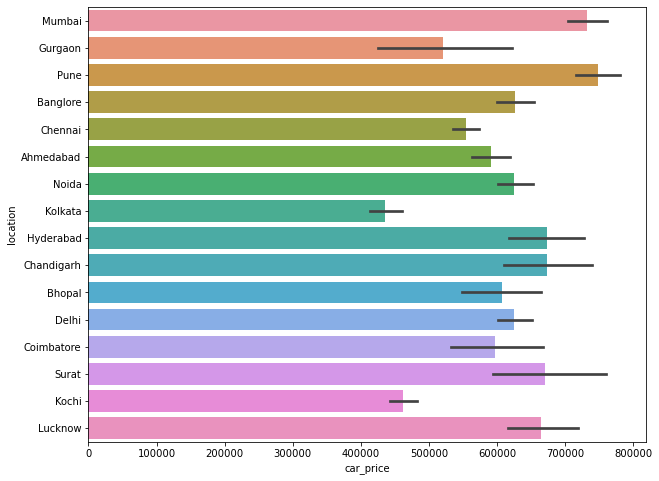

In [371]:
plt.figure(figsize=(10,8))
sns.barplot(y="location",x="car_price",data=df)

Mumbai and Pune has the highest prices of used cars compared to other cities

<AxesSubplot:xlabel='car_price', ylabel='car_fuel_type'>

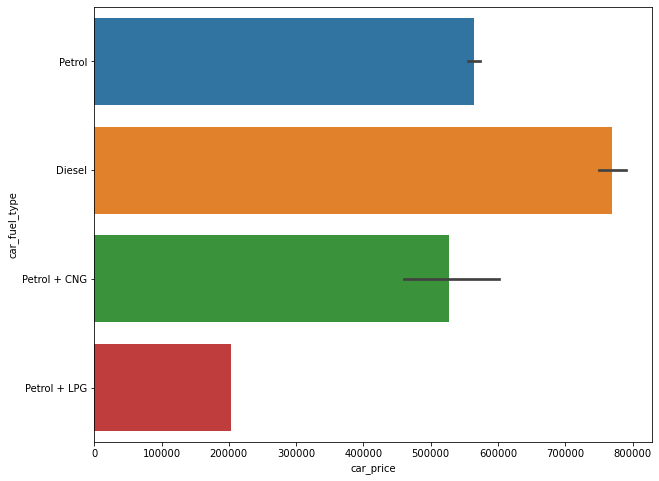

In [372]:
plt.figure(figsize=(10,8))
sns.barplot(y="car_fuel_type",x="car_price",data=df)

Diesel car have higher prices compared to others

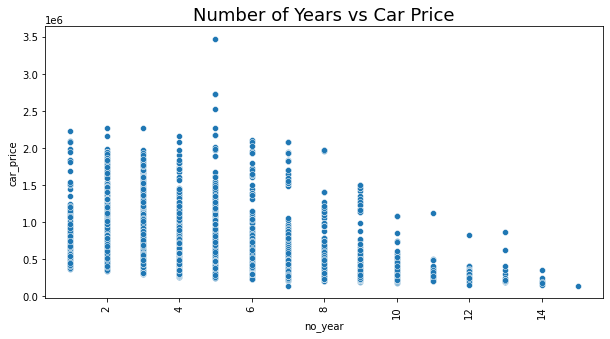

In [373]:
plt.figure(figsize=(10,5))
sns.scatterplot(df['no_year'], df['car_price'])
plt.title('Number of Years vs Car Price', size=18)
plt.xticks(rotation=90)
plt.show()

If the car is old as number of years is more, the price decreases

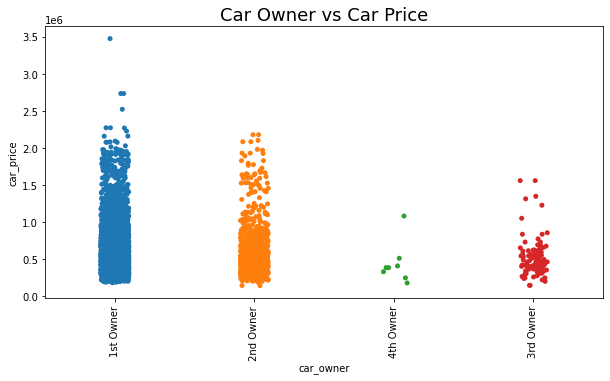

In [374]:
plt.figure(figsize=(10,5))
sns.stripplot(df['car_owner'], df['car_price'])
plt.title('Car Owner vs Car Price', size=18)
plt.xticks(rotation=90)
plt.show()

Used car when purchased with first owner has highest price as compared to others.

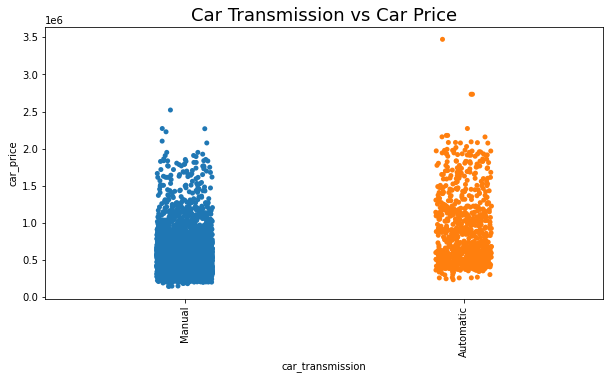

In [375]:
plt.figure(figsize=(10,5))
sns.stripplot(df['car_transmission'], df['car_price'])
plt.title('Car Transmission vs Car Price', size=18)
plt.xticks(rotation=90)
plt.show()

In [ ]:


for i in df.columns:
    sns.histplot(df[i])
    plt.show()

In [377]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
for i in range(0,df.shape[1]):
    if df.dtypes[i]=='object':
        df[df.columns[i]] = le.fit_transform(df[df.columns[i]])

<AxesSubplot:>

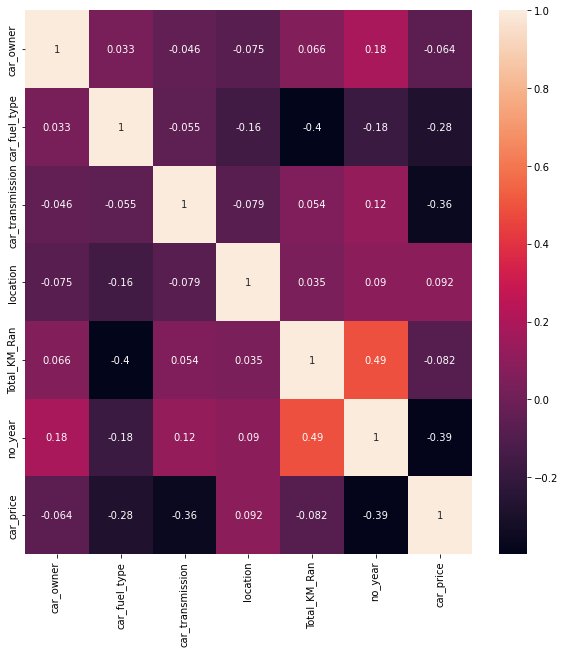

In [378]:
plt.figure(figsize=(10,10))
sns.heatmap(df[df.corr().index].corr(),annot=True)

There seems to be some relation between number of years and Total Km ran, as the year is more, the car is used more and vice-versa

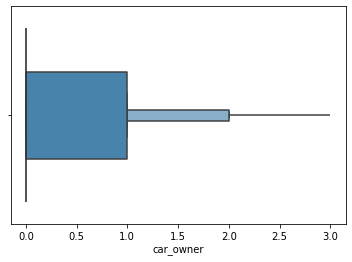

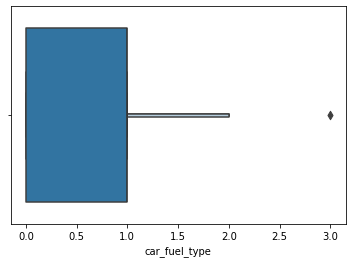

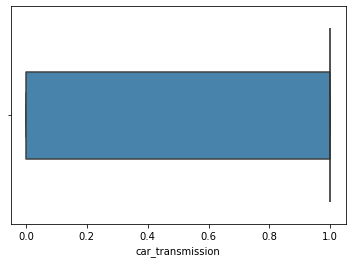

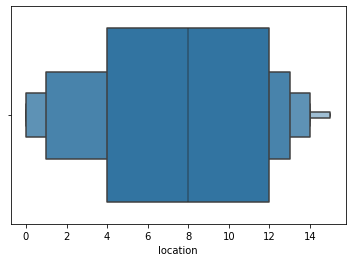

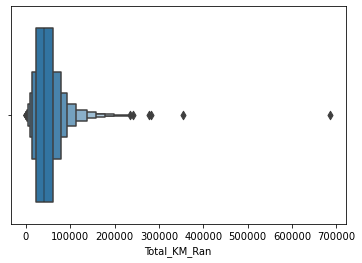

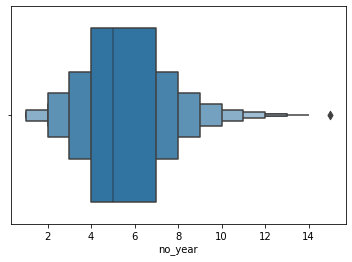

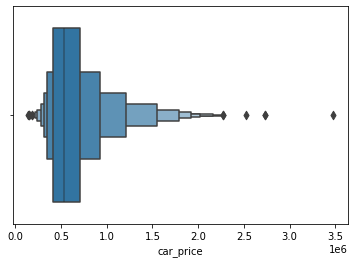

In [379]:
for i in df.columns:
    sns.boxenplot(df[i])
    plt.show()

In [380]:
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df=df.loc[(z_score<3).all(axis=1)]
print(df.shape)

(5342, 7)
(4992, 7)


In [390]:
((5342-4992)/5342)*100

6.551853238487458

In [381]:
df_x = df.iloc[:,1:]
y = df.iloc[:,0]

In [382]:
print(df_x.skew())
print("Total count of numeric features: ",len(df_x.skew()))
print("count of features which are significantly skewed: ",len(df_x.skew().loc[abs(df_x.skew())>0.5]))

car_fuel_type      -0.871095
car_transmission   -2.097097
location           -0.198047
Total_KM_Ran        0.756841
no_year             0.383629
car_price           1.386582
dtype: float64
Total count of numeric features:  6
count of features which are significantly skewed:  4


In [383]:
import numpy as np
for index in df_x.skew().index:
    if df_x.skew().loc[index]>0.5:
        df_x[index]=np.cbrt(df_x[index])
    if df_x.skew().loc[index]<-0.5:
        df_x[index]=np.sqrt(df_x[index])
print(df_x.skew())
print("Total count of numeric features: ",len(df_x.skew()))
print("count of features which are significantly skewed: ",len(df_x.skew().loc[abs(df_x.skew())>0.5]))

car_fuel_type      -0.970896
car_transmission   -2.097097
location           -0.198047
Total_KM_Ran       -0.359125
no_year             0.383629
car_price           0.672972
dtype: float64
Total count of numeric features:  6
count of features which are significantly skewed:  3


In [384]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_x)
x=sc.transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [386]:
df.head(2)

,car_owner,car_fuel_type,car_transmission,location,Total_KM_Ran,no_year,car_price
0,0,1,1,12,53242,8,413999
1,0,1,0,12,31248,3,714299


# Feature Importance

In [387]:
target=df[["car_price"]]
target.shape

(4992, 1)

In [392]:
features=df.drop(columns=['car_price'])

In [393]:
features.shape, target.shape

((4992, 6), (4992, 1))

In [394]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
feature_rf = RandomForestRegressor()
feature_rf.fit(features,target)
print(feature_rf.feature_importances_)

[0.0215605  0.15164475 0.08007418 0.12100489 0.37614619 0.24956949]


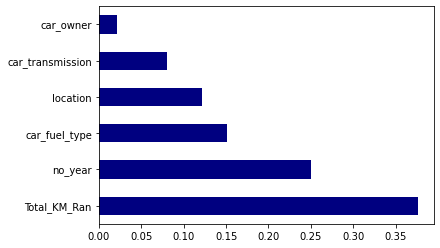

In [395]:
#plot graph of feature importances for better visualization
featureImportance = pd.Series(feature_rf.feature_importances_, index=features.columns)
featureImportance.nlargest(6).plot(kind='barh',color="navy") # Lets plot for 8 features 
plt.show()

# Model Building

In [396]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [397]:
features=df.drop(['car_price'], axis=1)
target=df[['car_price']]

In [398]:
# Define function to get the r2 Score for different Regression models
def get_r2_score(model,features,target):
    max_r2_score=0
    for i in range(40,100):
        x_train, x_test, y_train, y_test = train_test_split(features, target,random_state = i,test_size=0.20)
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        r2=r2_score(y_test,y_pred)
        print("r2 score corresponding to ",i," is ",r2)
        if r2>max_r2_score:
            max_r2_score=r2
            final_i=i
    print("At ",final_i,"r2 score is ",max_r2_score)
    return final_i

# Linear Regression

In [399]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
get_r2_score(lr,features,target)

r2 score corresponding to  40  is  0.3513836181983464
r2 score corresponding to  41  is  0.37759661075119766
r2 score corresponding to  42  is  0.3397520091637368
r2 score corresponding to  43  is  0.3601599624624433
r2 score corresponding to  44  is  0.3567247164621534
r2 score corresponding to  45  is  0.36583898455282526
r2 score corresponding to  46  is  0.3422511148675772
r2 score corresponding to  47  is  0.35501107854961256
r2 score corresponding to  48  is  0.36118371199333066
r2 score corresponding to  49  is  0.3652719009330171
r2 score corresponding to  50  is  0.3619180789573587
r2 score corresponding to  51  is  0.3743484723556002
r2 score corresponding to  52  is  0.3838387482121265
r2 score corresponding to  53  is  0.38243865632468643
r2 score corresponding to  54  is  0.3867933832947198
r2 score corresponding to  55  is  0.3595317002989983
r2 score corresponding to  56  is  0.3763572049289964
r2 score corresponding to  57  is  0.4008517586546143
r2 score corresponding 

90

In [400]:
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.20,random_state = 90)
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
r2_final_score=r2_score(y_test,pred_test)
r2_final_score

0.4061499368495347

In [401]:
from sklearn import metrics
# calculate MAE, MSE, RMSE on Train Data
print ("mean_absolute_error :",metrics.mean_absolute_error(y_train, pred_train))
print ("mean_squared_error : ",metrics.mean_squared_error(y_train, pred_train))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_train, pred_train)))

mean_absolute_error : 149552.3158411243
mean_squared_error :  39862545691.11766
root_mean_squared_error :  199656.0685056121


In [402]:
# calculate MAE, MSE, RMSE on Test Data
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, pred_test))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, pred_test))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, pred_test)))

mean_absolute_error : 156404.0098641668
mean_squared_error :  43156445780.26231
root_mean_squared_error :  207741.29531766742


In [403]:
#So with above data,lets select CV as 5, as most of them as same CV
from sklearn.model_selection import cross_val_score
lsScore_selected=cross_val_score(lr,features,target,cv=5).mean()
print("The CV score is :",lsScore_selected)

The CV score is : 0.30457921565014195


In [404]:
lr_data = {'Model': ['Linear Regression'], 
           'MAE': metrics.mean_absolute_error(y_test, pred_test),'MSE':metrics.mean_squared_error(y_test, pred_test),
           'RMSE':np.sqrt(metrics.mean_squared_error(y_test, pred_test)),
           'R2 Score': r2_final_score,
           'CV Score': lsScore_selected
          }

df_LR = pd.DataFrame(lr_data)
df_LR

,Model,MAE,MSE,RMSE,R2 Score,CV Score
0,Linear Regression,156404.009864,4.315645e+10,207741.295318,0.40615,0.304579


# Regularization Techniques
Once we use linear regression on a data-set divided in to training and test set, calculating the scores on training and test set can give us a rough idea about whether the model is suffering from over-fitting or under-fitting.

If we have very few features on a data-set and the score is poor for both training and test set then it’s a problem of under-fitting. On the other hand if we have large number of features and test score is relatively poor than the training score then it’s the problem of over-fitting.

Regularization is a simple technique to reduce model complexity and prevent over-fitting which may result from simple linear regression.

# Ridge

In [405]:
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=0.1,max_iter=20, normalize=True)

In [406]:
get_r2_score(ridgeReg,features,target)

r2 score corresponding to  40  is  0.3483446870513245
r2 score corresponding to  41  is  0.3720711034233847
r2 score corresponding to  42  is  0.3398196447100231
r2 score corresponding to  43  is  0.3576051010962784
r2 score corresponding to  44  is  0.35692013211231643
r2 score corresponding to  45  is  0.3650589143033116
r2 score corresponding to  46  is  0.34447390845468495
r2 score corresponding to  47  is  0.3514187722400598
r2 score corresponding to  48  is  0.35507577783909583
r2 score corresponding to  49  is  0.3662910088356043
r2 score corresponding to  50  is  0.3613784009684976
r2 score corresponding to  51  is  0.3726496413335556
r2 score corresponding to  52  is  0.38056556433348876
r2 score corresponding to  53  is  0.3798651387901575
r2 score corresponding to  54  is  0.3786799337689394
r2 score corresponding to  55  is  0.355257083217454
r2 score corresponding to  56  is  0.37335443490132736
r2 score corresponding to  57  is  0.39242237683609804
r2 score corresponding 

88

In [407]:
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.20,random_state = 88)
ridgeReg.fit(x_train,y_train)
ridge_pred = ridgeReg.predict(x_test)
ridge_pred_train = ridgeReg.predict(x_train)
r2_final_score=r2_score(y_test,ridge_pred)
r2_final_score

0.3976844022466597

In [408]:
ridge_cvScore=cross_val_score(ridgeReg,features,target,cv=5).mean()
print("The CV score is :",ridge_cvScore)

The CV score is : 0.30746128570474496


In [409]:
#Test Data
print("r2_score",r2_final_score)
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, ridge_pred))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, ridge_pred))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, ridge_pred)))
print("Cross Validation Score : ",ridge_cvScore)

r2_score 0.3976844022466597
mean_absolute_error : 144245.10275434307
mean_squared_error :  38453710500.31957
root_mean_squared_error :  196096.17665910668
Cross Validation Score :  0.30746128570474496


In [410]:
# Train Data
print("r2_score",r2_final_score)
print ("mean_absolute_error :",metrics.mean_absolute_error(y_train, ridge_pred_train))
print ("mean_squared_error : ",metrics.mean_squared_error(y_train, ridge_pred_train))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_train, ridge_pred_train)))
print ("Cross Validation Score : ", ridge_cvScore)

r2_score 0.3976844022466597
mean_absolute_error : 151419.32457287252
mean_squared_error :  41418198014.61397
root_mean_squared_error :  203514.61376179836
Cross Validation Score :  0.30746128570474496


In [411]:
ridge_data = {'Model': ['Ridge'], 
           'MAE': metrics.mean_absolute_error(y_test, ridge_pred),'MSE':metrics.mean_squared_error(y_test, ridge_pred),
           'RMSE':np.sqrt(metrics.mean_squared_error(y_test, ridge_pred)),
           'R2 Score': r2_final_score,
           'CV Score': ridge_cvScore
             }  

df_Ridge = pd.DataFrame(ridge_data)  
df_Ridge

,Model,MAE,MSE,RMSE,R2 Score,CV Score
0,Ridge,144245.102754,3.845371e+10,196096.176659,0.397684,0.307461


# Decision Tree Regressor

In [416]:
from sklearn.tree import DecisionTreeRegressor
dr=DecisionTreeRegressor(criterion="mae",max_features="auto",splitter="best",min_samples_split= 10)

In [417]:
get_r2_score(dr,features,target)

r2 score corresponding to  40  is  0.2227885597879672
r2 score corresponding to  41  is  0.22740600674172828
r2 score corresponding to  42  is  0.22400414553039905
r2 score corresponding to  43  is  0.2947512980027738
r2 score corresponding to  44  is  0.19400349876021983
r2 score corresponding to  45  is  0.34388297447649496
r2 score corresponding to  46  is  0.22703079739079735
r2 score corresponding to  47  is  0.24739902435742345
r2 score corresponding to  48  is  0.2545754063693225
r2 score corresponding to  49  is  0.23725639092215356
r2 score corresponding to  50  is  0.22226647166056424
r2 score corresponding to  51  is  0.3541279843211034
r2 score corresponding to  52  is  0.2699206900807988
r2 score corresponding to  53  is  0.26700364128243137
r2 score corresponding to  54  is  0.2609958258709898
r2 score corresponding to  55  is  0.27217011438489314
r2 score corresponding to  56  is  0.28583122579047004
r2 score corresponding to  57  is  0.2789551902345849
r2 score correspo

51

In [419]:
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.20,random_state = 51)
dr.fit(x_train,y_train)
dr_pred = dr.predict(x_test)
dr_pred_train = dr.predict(x_train)
r2_final_score=r2_score(y_test,dr_pred)
r2_final_score

0.3553255093879988

In [420]:
dtr_cvScore=cross_val_score(dr,features,target,cv=5).mean()
print("The CV score is :",dtr_cvScore)

The CV score is : 0.06806943253094104


In [421]:
# Train Data
print("r2_score",r2_final_score)
print ("mean_absolute_error :",metrics.mean_absolute_error(y_train, dr_pred_train))
print ("mean_squared_error : ",metrics.mean_squared_error(y_train, dr_pred_train))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_train, dr_pred_train)))
print ("Cross Validation Score : ", dtr_cvScore)

r2_score 0.3553255093879988
mean_absolute_error : 74563.51114450287
mean_squared_error :  18565246888.30453
root_mean_squared_error :  136254.3463097766
Cross Validation Score :  0.06806943253094104


In [422]:
#Test Data
print("r2_score",r2_final_score)
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, dr_pred))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, dr_pred))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, dr_pred)))
print("Cross Validation Score : ",dtr_cvScore)

r2_score 0.3553255093879988
mean_absolute_error : 137743.6936936937
mean_squared_error :  40633907259.75976
root_mean_squared_error :  201578.53868842227
Cross Validation Score :  0.06806943253094104


In [423]:
decisionTree_data = {'Model': ['Decision Tree Regressor'], 
           'MAE': metrics.mean_absolute_error(y_test, dr_pred),'MSE':metrics.mean_squared_error(y_test, dr_pred),
           'RMSE':np.sqrt(metrics.mean_squared_error(y_test, dr_pred)),
           'R2 Score': r2_score(y_test,dr_pred),
           'CV Score': dtr_cvScore
            }  

df_DT = pd.DataFrame(decisionTree_data)  
df_DT

,Model,MAE,MSE,RMSE,R2 Score,CV Score
0,Decision Tree Regressor,137743.693694,4.063391e+10,201578.538688,0.355326,0.068069


# Random Forest Regressor

In [424]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(criterion="mae",max_features="auto",n_estimators=10,min_samples_split=5,min_samples_leaf=2)

In [425]:
get_r2_score(rfr,features,target)

r2 score corresponding to  40  is  0.4337322310163526
r2 score corresponding to  41  is  0.4257335715835948
r2 score corresponding to  42  is  0.40845968551984113
r2 score corresponding to  43  is  0.4314179969753503
r2 score corresponding to  44  is  0.415268995428124
r2 score corresponding to  45  is  0.47316466850075833
r2 score corresponding to  46  is  0.4279606939099516
r2 score corresponding to  47  is  0.39273691305636316
r2 score corresponding to  48  is  0.44191551045798727
r2 score corresponding to  49  is  0.424856048541979
r2 score corresponding to  50  is  0.4120760843622272
r2 score corresponding to  51  is  0.4445457699844667
r2 score corresponding to  52  is  0.4860413760637503
r2 score corresponding to  53  is  0.45557405212069657
r2 score corresponding to  54  is  0.4626736101180645
r2 score corresponding to  55  is  0.45540530448559835
r2 score corresponding to  56  is  0.48405076242669753
r2 score corresponding to  57  is  0.45436304692421126
r2 score corresponding

90

In [426]:
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.20,random_state = 90)
rfr=RandomForestRegressor(criterion="mae",max_features="auto",n_estimators=10,min_samples_split=5,min_samples_leaf=2)
rfr.fit(x_train,y_train)
rfr_pred = rfr.predict(x_test)
rfr_pred_train = rfr.predict(x_train)
r2_final_score=r2_score(y_test,rfr_pred)
r2_final_score

0.5021323029613018

In [443]:
rfr_cvScore=cross_val_score(rfr,features,target,cv=7,scoring='r2').mean()
print("The CV score is :",rfr_cvScore)

The CV score is : 0.3038496154100588


In [444]:
# Train Data
print("r2_score",r2_final_score)
print ("mean_absolute_error :",metrics.mean_absolute_error(y_train, rfr_pred_train))
print ("mean_squared_error : ",metrics.mean_squared_error(y_train, rfr_pred_train))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_train, rfr_pred_train)))
print ("Cross Validation Score : ", rfr_cvScore)

r2_score 0.5021323029613018
mean_absolute_error : 87751.98347107437
mean_squared_error :  17035832595.992989
root_mean_squared_error :  130521.38750409064
Cross Validation Score :  0.3038496154100588


In [445]:
#Test Data
print("r2_score",r2_final_score)
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, rfr_pred))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, rfr_pred))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))
print("Cross Validation Score : ",rfr_cvScore)

r2_score 0.5021323029613018
mean_absolute_error : 138501.3013013013
mean_squared_error :  36181187148.4985
root_mean_squared_error :  190213.53040332987
Cross Validation Score :  0.3038496154100588


In [446]:
randomForest_data = {'Model': ['Random Forest'], 
           'MAE': metrics.mean_absolute_error(y_test, rfr_pred),'MSE':metrics.mean_squared_error(y_test, rfr_pred),
           'RMSE':np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)),
           'R2 Score': r2_score(y_test,rfr_pred),
           'CV Score': rfr_cvScore
            }  

df_RF = pd.DataFrame(randomForest_data)  
df_RF

,Model,MAE,MSE,RMSE,R2 Score,CV Score
0,Random Forest,138501.301301,3.618119e+10,190213.530403,0.502132,0.30385


In [447]:
modelDF=pd.concat([df_LR,df_Ridge,df_DT,df_RF]).reset_index()
modelDF.drop(columns=['index'],axis=1,inplace=True)
modelDF

,Model,MAE,MSE,RMSE,R2 Score,CV Score
0,Linear Regression,156404.009864,4.315645e+10,207741.295318,0.406150,0.304579
1,Ridge,144245.102754,3.845371e+10,196096.176659,0.397684,0.307461
2,Decision Tree Regressor,137743.693694,4.063391e+10,201578.538688,0.355326,0.068069
3,Random Forest,138501.301301,3.618119e+10,190213.530403,0.502132,0.303850


<AxesSubplot:ylabel='Density'>

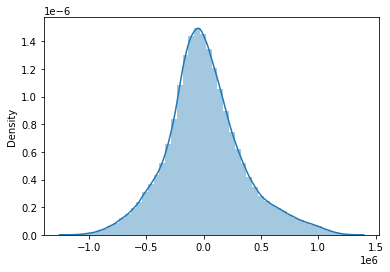

In [448]:
predictions=rfr.predict(x_test)
sns.distplot(np.array(y_test)-predictions)

The curve seems to be normal,hence the the selection of the Random Forest Regression model is correct.Also r2 score for Random Forest regression is better than other models

# Save the Model

In [449]:
from joblib import dump , load
dump(rfr,'CarPricePrediction.joblib')
rfr_load=load('CarPricePrediction.joblib')

In [450]:
from tempfile import mkdtemp
savedir = mkdtemp()
import os
filename = os.path.join(savedir, 'CarPricePrediction.joblib')

In [451]:
import joblib
joblib.dump(rfr, filename) 
#['...CarPricePrediction.joblib']

['C:\\Users\\mum1user\\AppData\\Local\\Temp\\tmpqfa1zrzz\\CarPricePrediction.joblib']

In [452]:
joblib.load(filename)

RandomForestRegressor(criterion='mae', min_samples_leaf=2, min_samples_split=5,
                      n_estimators=10)